In [1]:
from pybbn.graph.dag import Bbn
from pybbn.graph.edge import Edge, EdgeType
from pybbn.graph.jointree import EvidenceBuilder
from pybbn.graph.node import BbnNode
from pybbn.graph.variable import Variable
from pybbn.pptc.inferencecontroller import InferenceController

In [299]:
click_button = BbnNode(Variable(0, 'click_button', ['click', 'ignore']), [0.3, 0.7])
has_cards = BbnNode(Variable(1, 'has_cards', ['cards', 'empty']), [0.4, 0.6])
six_months_breakage = BbnNode(Variable(2, 'six_months_breakage', ['yes', 'no']), [0.51, 0.49])
six_months_breakage = BbnNode(Variable(2, 'six_months_breakage', ['yes', 'no']),
               [0.49, # P(yes|click and cards) 
                0.51, # P(no|click and cards)
                0.1, # P(yes|click and empty) 
                0.9, # P(no|click and empty)
                
                0.51, # P(yes|ignore and cards)
                0.49, # P(no|ignore and cards)
                0.1, # P(yes|ignore and empty)
                0.9, # P(no|ignore and empty)
               ])

bbn = Bbn() \
    .add_node(click_button) \
    .add_node(has_cards) \
    .add_node(six_months_breakage) \
    .add_edge(Edge(click_button, six_months_breakage, EdgeType.DIRECTED)) \
    .add_edge(Edge(has_cards, six_months_breakage, EdgeType.DIRECTED)) \

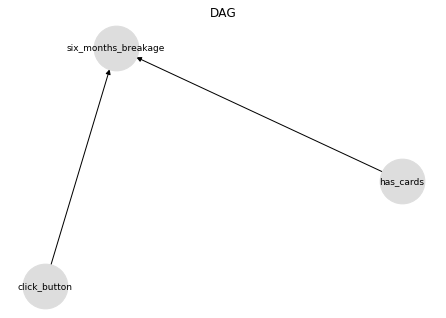

In [300]:
%matplotlib inline
from pybbn.generator.bbngenerator import convert_for_drawing
import matplotlib.pyplot as plt
import networkx as nx
import warnings

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    
    graph = convert_for_drawing(bbn)
    pos = nx.spring_layout(graph)

    labels = dict([(k, node.variable.name) for k, node in bbn.nodes.items()])
    nx.draw(graph, pos=pos, with_labels=True, labels=labels, node_size=2000, node_color="#DDDDDD", font_size=9)
    plt.title('DAG')

In [304]:
join_tree = InferenceController.apply(bbn)
# ev = EvidenceBuilder() \
#     .with_node(join_tree.get_bbn_node_by_name('click_button')) \
#     .with_evidence('click', 1.0) \
#     .build()
# join_tree.set_observation(ev)

# ev2 = EvidenceBuilder() \
#     .with_node(join_tree.get_bbn_node_by_name('preassure')) \
#     .with_evidence('high', 1.0) \
#     .build()
# join_tree.set_observation(ev2)

for node in join_tree.get_bbn_nodes():
    potential = join_tree.get_bbn_potential(node)
    print(node)
    print(potential)
    print('--------------------->')

1|has_cards|cards,empty
1=cards|0.40000
1=empty|0.60000
--------------------->
2|six_months_breakage|yes,no
2=yes|0.26160
2=no|0.73840
--------------------->
0|click_button|click,ignore
0=click|0.30000
0=ignore|0.70000
--------------------->


In [280]:
season = BbnNode(Variable(0, 'season', ['winter', 'summer']), [0.5, 0.5])
preassure = BbnNode(Variable(1, 'preassure', ['high', 'low']), [0.5, 0.5])
rain = BbnNode(Variable(2, 'rain', ['rainy', 'sunny']),
               [0.9, # P(rainy|winter and high) 
                0.1, # P(sunny|winter and high)
                0.95, # P(rainy|winter and low) 
                0.05, # P(sunny|winter and low)
                
                0.9, # P(rainy|summer and high)
                0.1, # P(sunny|summer and high)
                0.1, # P(rainy|summer and low)
                0.9, # P(sunny|summer and low)
               ])

bbn = Bbn() \
    .add_node(season) \
    .add_node(preassure) \
    .add_node(rain) \
    .add_edge(Edge(season, rain, EdgeType.DIRECTED)) \
    .add_edge(Edge(preassure, rain, EdgeType.DIRECTED)) \

In [281]:
join_tree = InferenceController.apply(bbn)
ev = EvidenceBuilder() \
    .with_node(join_tree.get_bbn_node_by_name('season')) \
    .with_evidence('summer', 1.0) \
    .build()
join_tree.set_observation(ev)

# ev2 = EvidenceBuilder() \
#     .with_node(join_tree.get_bbn_node_by_name('preassure')) \
#     .with_evidence('high', 1.0) \
#     .build()
# join_tree.set_observation(ev2)

for node in join_tree.get_bbn_nodes():
    potential = join_tree.get_bbn_potential(node)
    print(node)
    print(potential)
    print('--------------------->')

1|preassure|high,low
1=high|0.50000
1=low|0.50000
--------------------->
2|rain|rainy,sunny
2=rainy|0.50000
2=sunny|0.50000
--------------------->
0|season|winter,summer
0=winter|0.00000
0=summer|1.00000
--------------------->
